In [52]:
using Plots, CSV, DataFrames, QuantEcon, StatsBase, Images, Interpolations

In [290]:
α = 0.64
δ = 0.025

# Asset
amin = 0.0
amax = 40.0
curv = 1.7
na = 101 # number of asset grids
agrid = [amin + amax * ((ia-1)/(na-1)) ^ curv for ia in 1:na];

# Productivity
ρx = 0.929
σx = 0.227
nz = 61 # number of labor prod shocks
ezgrid = exp.(range(-3 * σx, 3 * σx, length = nz));
mc = tauchen(nz, ρx, σx * sqrt(1 - ρx ^ 2), 0);
Π = mc.p;
SSprob = stationary_distributions(mc)[1];

In [291]:
HR = convert(Matrix, CSV.read("./output/oneskill/HR.csv", DataFrame))
AS = convert(Matrix, CSV.read("./output/oneskill/AS.csv", DataFrame))
μ = convert(Matrix, CSV.read("./output/oneskill/MU.csv", DataFrame));

In [292]:
L = sum([ez * sum(μ[:,iz] .* HR[:,iz]) for (iz, ez) in enumerate(ezgrid)])
K = sum([sum(μ[ia,:] .* a) for (ia, a) in enumerate(agrid)])
w = α * (K/L) ^ (1-α);

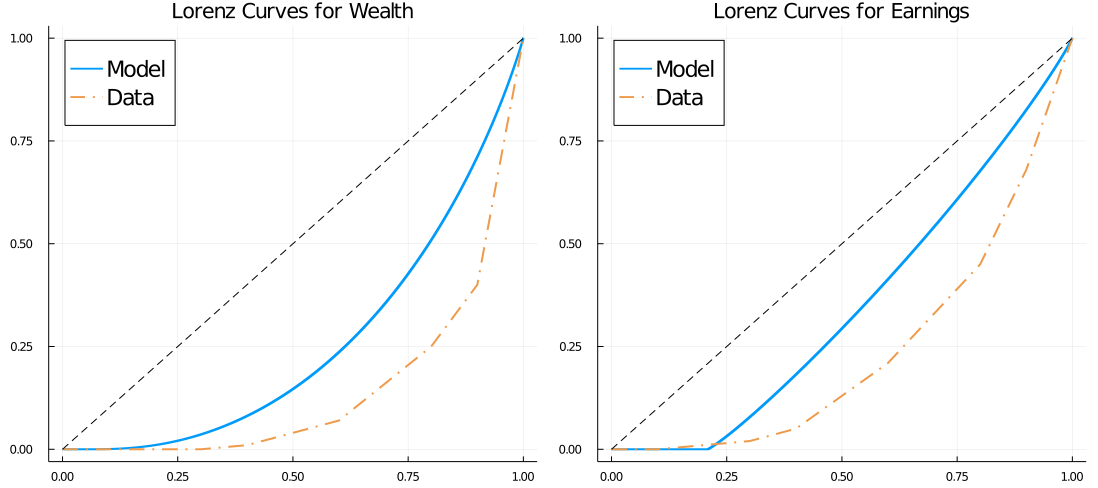

In [337]:
Data_Lorenza = [0.0, 0.0, 0.0, 0.0, 0.01, 0.04, 0.07, 0.16, 0.25, 0.4, 1.0];
Data_Lorenze = [0.0, 0.0, 0.01, 0.02, 0.05, 0.13, 0.21, 0.33, 0.45, 0.68, 1.0];

smps = [sample(1:na, weights(μ[:,iz]./sum(μ[:,iz])), floor(Int32, SSprob[iz]*1000000)) for iz in 1:nz]
wlth = sort([agrid[ia] for smp in smps for ia in smp])
earn = sort([w * ezgrid[iz] * HR[ia,iz] for (iz, smp) in enumerate(smps) for ia in smp])
lorenz = DataFrame(wlth=wlth, earn=earn)
CSV.write("./output/oneskill/lorenz_one.csv", lorenz);

l = @layout [a b]
p1 = plot(range(0.0,1.0,length=length(wlth)), cumsum(wlth) ./ sum(wlth),
    legend=:topleft, legendfontsize=15, label="Model", lw=2, title="Lorenz Curves for Wealth")
plot!(p1, 0.0:0.1:1.0, Data_Lorenza, linestyle=:dashdot, label="Data", lw=2, color=:tan2)
plot!(p1, 0:0.1:1, 0:0.1:1, color=:black, lw=1, label="", linestyle=:dash)

p2 = plot(range(0.0,1.0,length=length(earn)), cumsum(earn) ./ sum(earn),
    legend=:topleft, legendfontsize=15, label="Model", lw=2, title="Lorenz Curves for Earnings")
plot!(p2, 0.0:0.1:1.0, Data_Lorenze, linestyle=:dashdot, label="Data", lw=2, color=:tan2)
plot!(p2, 0:0.1:1, 0:0.1:1, color=:black, lw=1, label="", linestyle=:dash)
plot(p1, p2, size=(nz*18,nz*8), fmt=:png)

In [338]:
# reservation wage index
rw = [findfirst(x->x>0, transpose(HR)[:,ia]) for ia in 1:na]
rw[findall(x->x==nothing,rw)] .= nz;

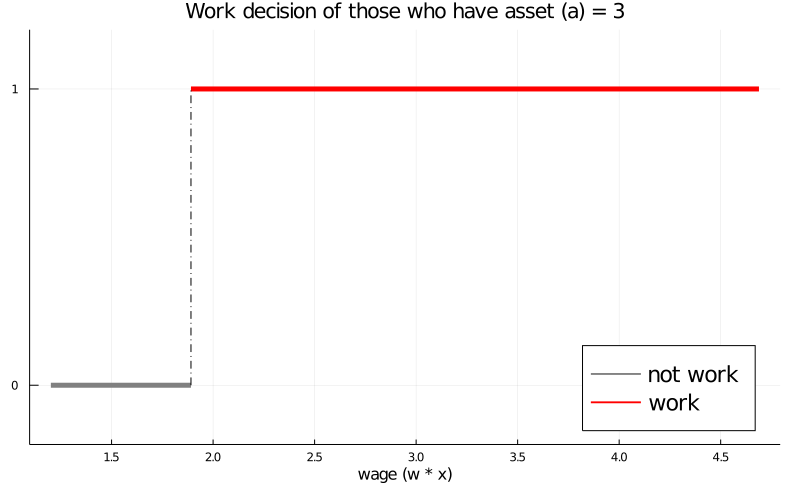

In [339]:
plot(w.*ezgrid[1:rw[24]], zeros(rw[24]), color=:gray, lw=5, ylim=(-0.2, 1.2), label="not work", fmt=:png, size=(na*7.85,nz*8),
    legendfontsize=15, legend=:bottomright, xlabel="wage (w * x)", yticks=[0,1], title="Work decision of those who have asset (a) = 3")
plot!(w.*ezgrid[rw[24]:end], ones(nz-rw[24]+1), color=:red, lw=5, label="work")
plot!(w.*[ezgrid[rw[24]],ezgrid[rw[24]]], [0,1], linestyle=:dashdot, color=:black, label=:none)

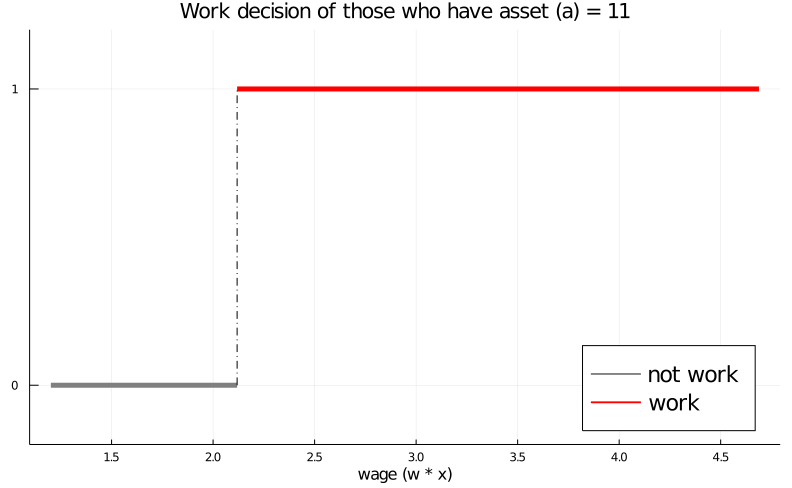

In [340]:
plot(w.*ezgrid[1:rw[48]], zeros(rw[48]), color=:gray, lw=5, ylim=(-0.2, 1.2), label="not work", fmt=:png, size=(na*7.85,nz*8), 
    legendfontsize=15, legend=:bottomright, xlabel="wage (w * x)", yticks=[0,1], title="Work decision of those who have asset (a) = 11")
plot!(w.*ezgrid[rw[48]:end], ones(nz-rw[48]+1), color=:red, lw=5, label="work")
plot!(w.*[ezgrid[rw[48]],ezgrid[rw[48]]], [0,1], linestyle=:dashdot, color=:black, label=:none)

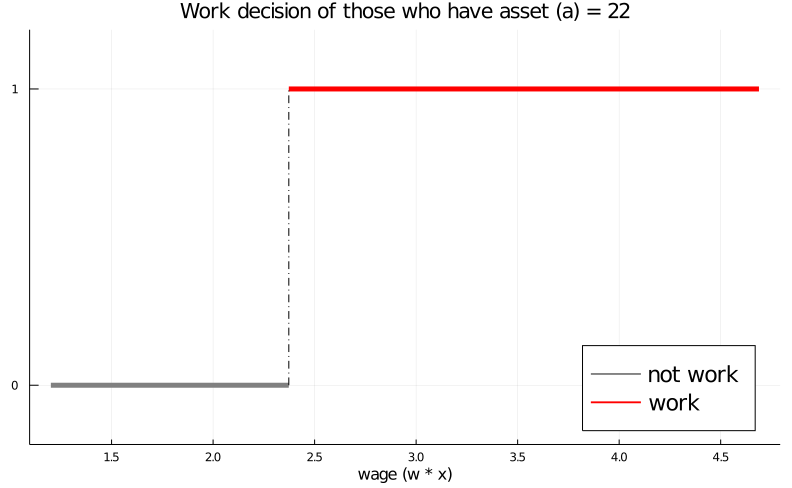

In [341]:
plot(w.*ezgrid[1:rw[72]], zeros(rw[72]), color=:gray, lw=5, ylim=(-0.2, 1.2), label="not work", fmt=:png, size=(na*7.85,nz*8), 
    legendfontsize=15, legend=:bottomright, xlabel="wage (w * x)", yticks=[0,1], title="Work decision of those who have asset (a) = 22")
plot!(w.*ezgrid[rw[72]:end], ones(nz-rw[72]+1), color=:red, lw=5, label="work")
plot!(w.*[ezgrid[rw[72]],ezgrid[rw[72]]], [0,1], linestyle=:dashdot, color=:black, label=:none)

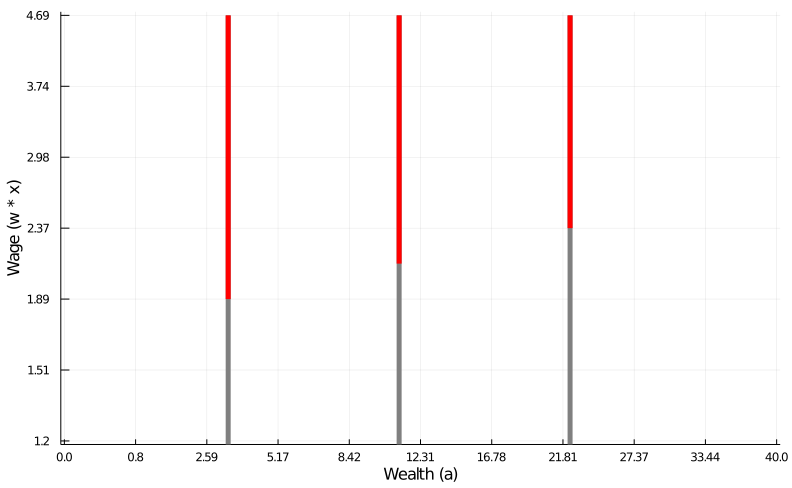

In [342]:
plot(color=:black, lw=5, label="Reservation Wage", legend=:bottomright, legendfontsize=15, size=(na*7.85,nz*8),
    yticks=(1:10:nz, round.(w .* ezgrid[1:10:nz],digits=2)), ylabel="Wage (w * x)",
    xticks=(1:10:na, round.(agrid[1:10:na], digits=2)), fmt=:png, xlabel="Wealth (a)", xlim=(0.5,na+0.5), ylim=(0.5,nz+0.5)) 
plot!([24, 24], [0,nz], color=:gray, lw=5, label="")
plot!([24, 24], [rw[24],nz], color=:red, lw=5, label="")
plot!([48, 48], [0,nz], color=:gray, lw=5, label="")
plot!([48, 48], [rw[48],nz], color=:red, lw=5, label="")
plot!([72, 72], [0,nz], color=:gray, lw=5, label="")
plot!([72, 72], [rw[72],nz], color=:red, lw=5, label="")

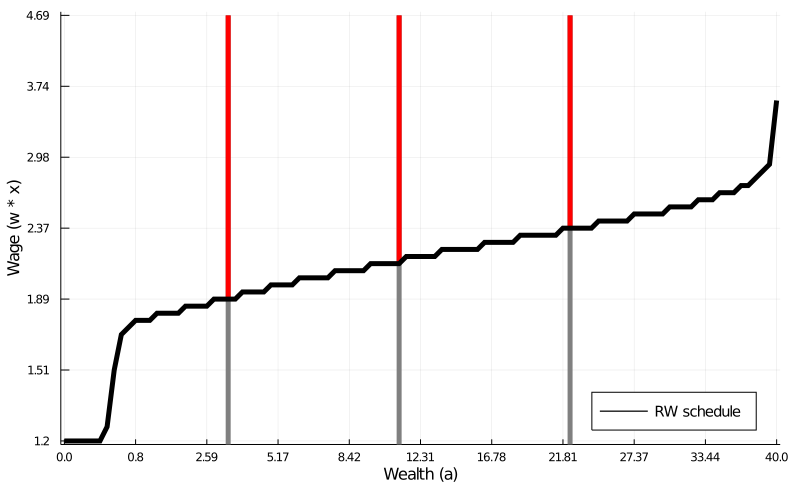

In [343]:
plot(color=:black, lw=5, label="Reservation Wage", legend=:bottomright, legendfontsize=10, size=(na*7.85,nz*8),
    yticks=(1:10:nz, round.(w .* ezgrid[1:10:nz],digits=2)), ylabel="Wage (w * x)",
    xticks=(1:10:na, round.(agrid[1:10:na], digits=2)), fmt=:png, xlabel="Wealth (a)", xlim=(0.5,na+0.5), ylim=(0.5,nz+0.5)) 
plot!([24, 24], [0,nz], color=:gray, lw=5, label="")
plot!([24, 24], [rw[24],nz], color=:red, lw=5, label="")
plot!([48, 48], [0,nz], color=:gray, lw=5, label="")
plot!([48, 48], [rw[48],nz], color=:red, lw=5, label="")
plot!([72, 72], [0,nz], color=:gray, lw=5, label="")
plot!([72, 72], [rw[72],nz], color=:red, lw=5, label="")
plot!(1:na, rw, color=:black, lw=5, label="RW schedule")

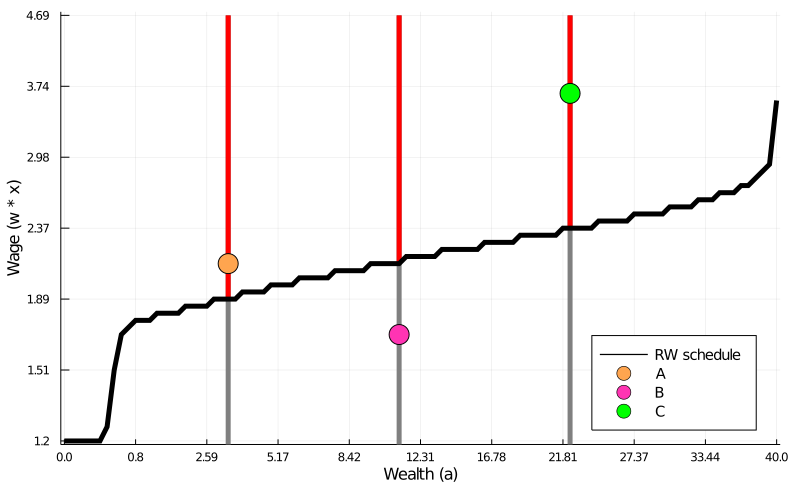

In [344]:
plot(color=:black, lw=5, label="Reservation Wage", legend=:bottomright, legendfontsize=10, size=(na*7.85,nz*8),
    yticks=(1:10:nz, round.(w .* ezgrid[1:10:nz],digits=2)), ylabel="Wage (w * x)",
    xticks=(1:10:na, round.(agrid[1:10:na], digits=2)), fmt=:png, xlabel="Wealth (a)", xlim=(0.5,na+0.5), ylim=(0.5,nz+0.5)) 
plot!([24, 24], [0,nz], color=:gray, lw=5, label="")
plot!([24, 24], [rw[24],nz], color=:red, lw=5, label="")
plot!([48, 48], [0,nz], color=:gray, lw=5, label="")
plot!([48, 48], [rw[48],nz], color=:red, lw=5, label="")
plot!([72, 72], [0,nz], color=:gray, lw=5, label="")
plot!([72, 72], [rw[72],nz], color=:red, lw=5, label="")
plot!(1:na, rw, color=:black, lw=5, label="RW schedule")
scatter!([24], [26], label="A", markersize=12, color=:tan1)
scatter!([48], [16], label="B", markersize=12, color=:maroon1)
scatter!([72], [50], label="C", markersize=12, color=:lime)

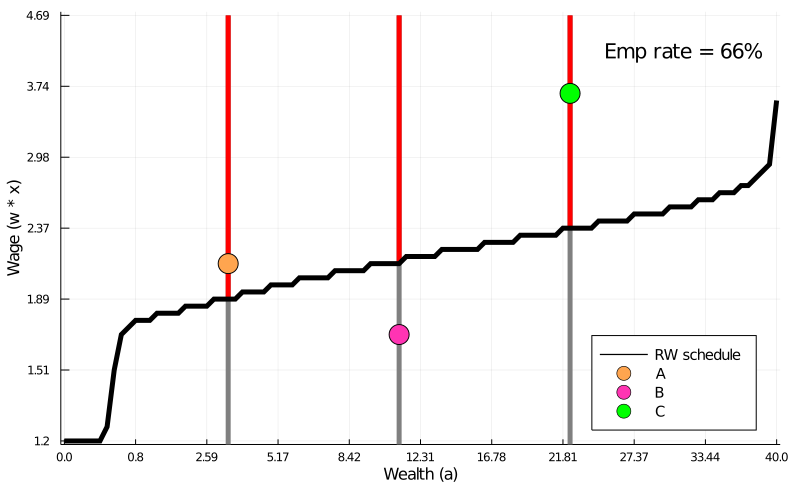

In [345]:
plot(color=:black, lw=5, label="Reservation Wage", legend=:bottomright, legendfontsize=10, size=(na*7.85,nz*8),
    yticks=(1:10:nz, round.(w .* ezgrid[1:10:nz],digits=2)), ylabel="Wage (w * x)",
    xticks=(1:10:na, round.(agrid[1:10:na], digits=2)), fmt=:png, xlabel="Wealth (a)", xlim=(0.5,na+0.5), ylim=(0.5,nz+0.5)) 
plot!([24, 24], [0,nz], color=:gray, lw=5, label="")
plot!([24, 24], [rw[24],nz], color=:red, lw=5, label="")
plot!([48, 48], [0,nz], color=:gray, lw=5, label="")
plot!([48, 48], [rw[48],nz], color=:red, lw=5, label="")
plot!([72, 72], [0,nz], color=:gray, lw=5, label="")
plot!([72, 72], [rw[72],nz], color=:red, lw=5, label="")
plot!(1:na, rw, color=:black, lw=5, label="RW schedule")
scatter!([24], [26], label="A", markersize=12, color=:tan1)
scatter!([48], [16], label="B", markersize=12, color=:maroon1)
scatter!([72], [50], label="C", markersize=12, color=:lime)
annotate!(88, 56, "Emp rate = 66%")

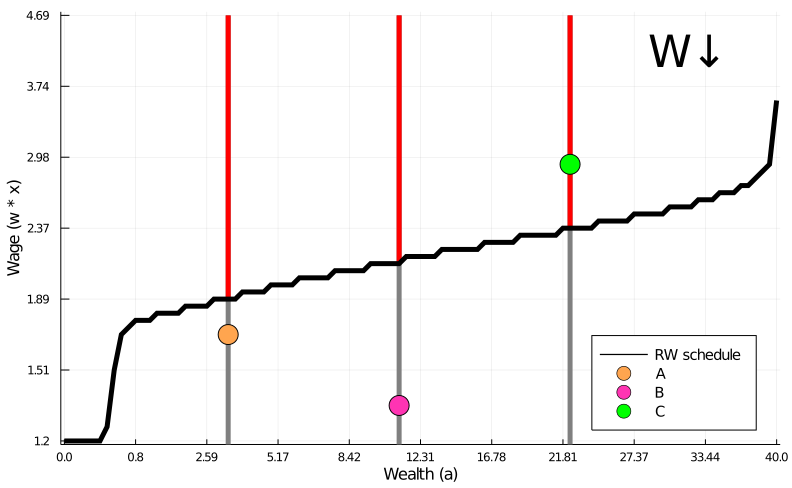

In [346]:
plot(color=:black, lw=5, label="Reservation Wage", legend=:bottomright, legendfontsize=10, size=(na*7.85,nz*8),
    yticks=(1:10:nz, round.(w .* ezgrid[1:10:nz],digits=2)), ylabel="Wage (w * x)",
    xticks=(1:10:na, round.(agrid[1:10:na], digits=2)), fmt=:png, xlabel="Wealth (a)", xlim=(0.5,na+0.5), ylim=(0.5,nz+0.5)) 
plot!([24, 24], [0,nz], color=:gray, lw=5, label="")
plot!([24, 24], [rw[24],nz], color=:red, lw=5, label="")
plot!([48, 48], [0,nz], color=:gray, lw=5, label="")
plot!([48, 48], [rw[48],nz], color=:red, lw=5, label="")
plot!([72, 72], [0,nz], color=:gray, lw=5, label="")
plot!([72, 72], [rw[72],nz], color=:red, lw=5, label="")
plot!(1:na, rw, color=:black, lw=5, label="RW schedule")
scatter!([24], [16], label="A", markersize=12, color=:tan1)
scatter!([48], [6], label="B", markersize=12, color=:maroon1)
scatter!([72], [40], label="C", markersize=12, color=:lime)
annotate!(88, 56, text("W↓",:black, 30))

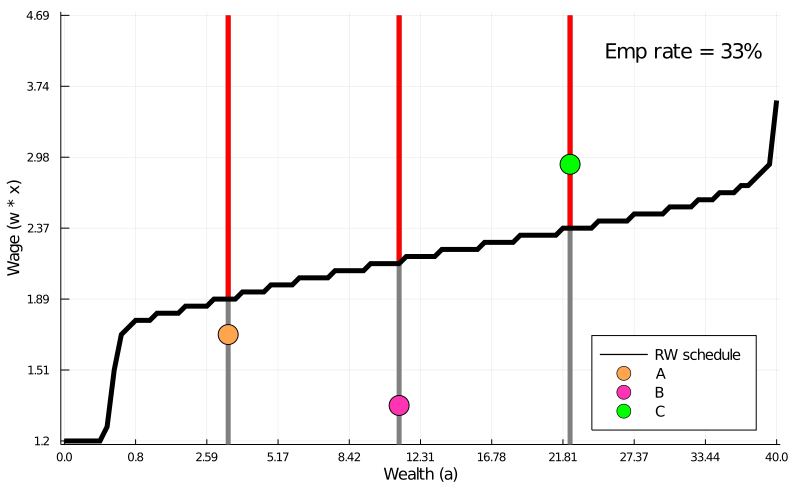

In [347]:
plot(color=:black, lw=5, label="Reservation Wage", legend=:bottomright, legendfontsize=10, size=(na*7.85,nz*8),
    yticks=(1:10:nz, round.(w .* ezgrid[1:10:nz],digits=2)), ylabel="Wage (w * x)",
    xticks=(1:10:na, round.(agrid[1:10:na], digits=2)), fmt=:png, xlabel="Wealth (a)", xlim=(0.5,na+0.5), ylim=(0.5,nz+0.5)) 
plot!([24, 24], [0,nz], color=:gray, lw=5, label="")
plot!([24, 24], [rw[24],nz], color=:red, lw=5, label="")
plot!([48, 48], [0,nz], color=:gray, lw=5, label="")
plot!([48, 48], [rw[48],nz], color=:red, lw=5, label="")
plot!([72, 72], [0,nz], color=:gray, lw=5, label="")
plot!([72, 72], [rw[72],nz], color=:red, lw=5, label="")
plot!(1:na, rw, color=:black, lw=5, label="RW schedule")
scatter!([24], [16], label="A", markersize=12, color=:tan1)
scatter!([48], [6], label="B", markersize=12, color=:maroon1)
scatter!([72], [40], label="C", markersize=12, color=:lime)
annotate!(88, 56, "Emp rate = 33%")

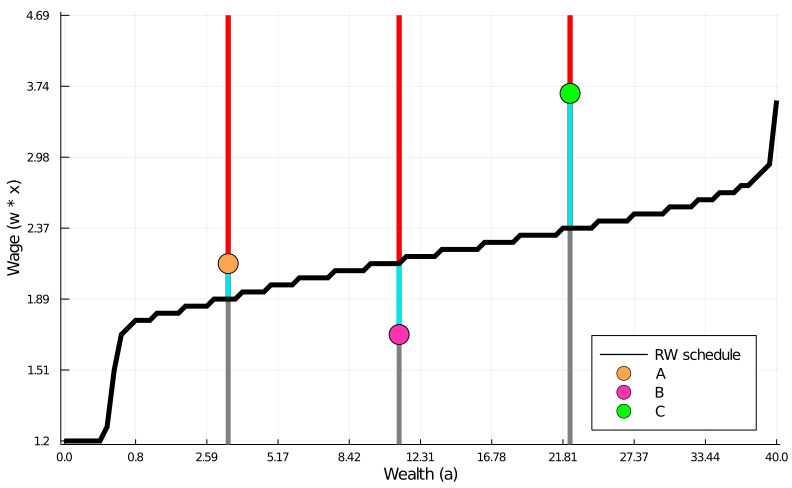

In [348]:
plot(color=:black, lw=5, label="Reservation Wage", legend=:bottomright, legendfontsize=10, size=(na*7.85,nz*8),
    yticks=(1:10:nz, round.(w .* ezgrid[1:10:nz],digits=2)), ylabel="Wage (w * x)",
    xticks=(1:10:na, round.(agrid[1:10:na], digits=2)), fmt=:png, xlabel="Wealth (a)", xlim=(0.5,na+0.5), ylim=(0.5,nz+0.5)) 
plot!([24, 24], [0,nz], color=:gray, lw=5, label="")
plot!([24, 24], [rw[24],nz], color=:red, lw=5, label="")
plot!([48, 48], [0,nz], color=:gray, lw=5, label="")
plot!([48, 48], [rw[48],nz], color=:red, lw=5, label="")
plot!([72, 72], [0,nz], color=:gray, lw=5, label="")
plot!([72, 72], [rw[72],nz], color=:red, lw=5, label="")

plot!([24, 24], [rw[24],26], color=:turquoise2, lw=5, label="")
plot!([48, 48], [16,rw[48]], color=:turquoise2, lw=5, label="")
plot!([72, 72], [rw[72],50], color=:turquoise2, lw=5, label="")

plot!(1:na, rw, color=:black, lw=5, label="RW schedule")
scatter!([24], [26], label="A", markersize=12, color=:tan1)
scatter!([48], [16], label="B", markersize=12, color=:maroon1)
scatter!([72], [50], label="C", markersize=12, color=:lime)

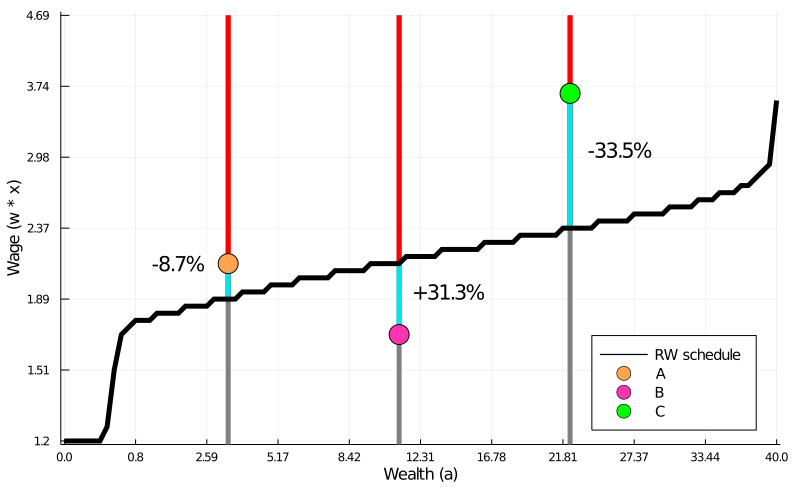

In [349]:
plot(color=:black, lw=5, label="Reservation Wage", legend=:bottomright, legendfontsize=10, size=(na*7.85,nz*8),
    yticks=(1:10:nz, round.(w .* ezgrid[1:10:nz],digits=2)), ylabel="Wage (w * x)",
    xticks=(1:10:na, round.(agrid[1:10:na], digits=2)), fmt=:png, xlabel="Wealth (a)", xlim=(0.5,na+0.5), ylim=(0.5,nz+0.5)) 
plot!([24, 24], [0,nz], color=:gray, lw=5, label="")
plot!([24, 24], [rw[24],nz], color=:red, lw=5, label="")
plot!([48, 48], [0,nz], color=:gray, lw=5, label="")
plot!([48, 48], [rw[48],nz], color=:red, lw=5, label="")
plot!([72, 72], [0,nz], color=:gray, lw=5, label="")
plot!([72, 72], [rw[72],nz], color=:red, lw=5, label="")

plot!([24, 24], [rw[24],26], color=:turquoise2, lw=5, label="")
plot!([48, 48], [16,rw[48]], color=:turquoise2, lw=5, label="")
plot!([72, 72], [rw[72],50], color=:turquoise2, lw=5, label="")

plot!(1:na, rw, color=:black, lw=5, label="RW schedule")
scatter!([24], [26], label="A", markersize=12, color=:tan1)
scatter!([48], [16], label="B", markersize=12, color=:maroon1)
scatter!([72], [50], label="C", markersize=12, color=:lime)

annotate!(17, 26, "-8.7%")
annotate!(55, 22, "+31.3%")
annotate!(79, 42, "-33.5%")

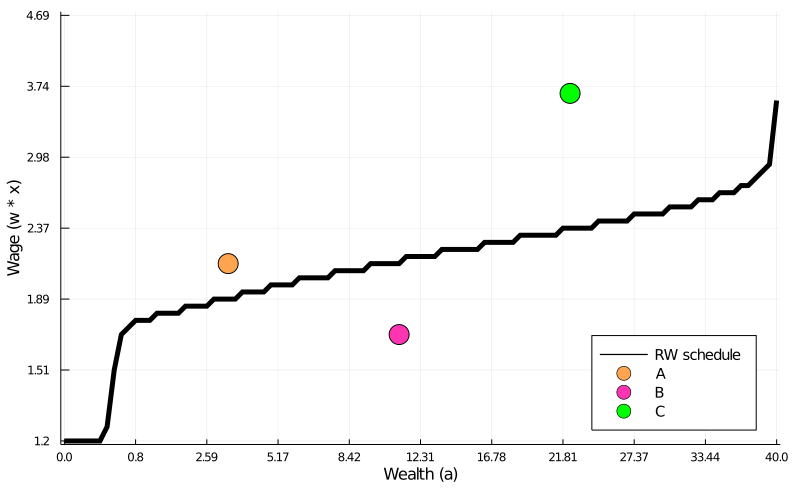

In [350]:
plot(color=:black, lw=5, label="Reservation Wage", legend=:bottomright, legendfontsize=10, size=(na*7.85,nz*8),
    yticks=(1:10:nz, round.(w .* ezgrid[1:10:nz],digits=2)), ylabel="Wage (w * x)",
    xticks=(1:10:na, round.(agrid[1:10:na], digits=2)), fmt=:png, xlabel="Wealth (a)", xlim=(0.5,na+0.5), ylim=(0.5,nz+0.5)) 
plot!(1:na, rw, color=:black, lw=5, label="RW schedule")
scatter!([24], [26], label="A", markersize=12, color=:tan1)
scatter!([48], [16], label="B", markersize=12, color=:maroon1)
scatter!([72], [50], label="C", markersize=12, color=:lime)

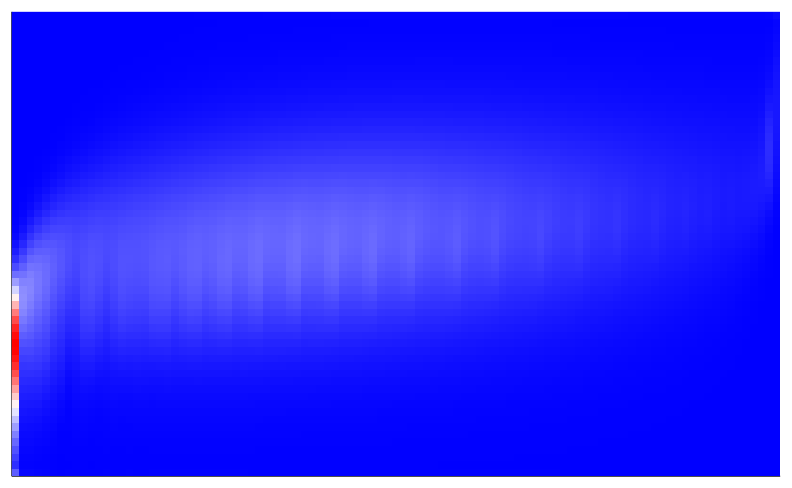

In [351]:
heatmap(transpose(μ), c=cgrad([:blue, :white, :red]),
    xlabel="",ylabel="",xticks=:none,yticks=:none, fmt=:png, cbar=:none, size=(na*7.85,nz*8))

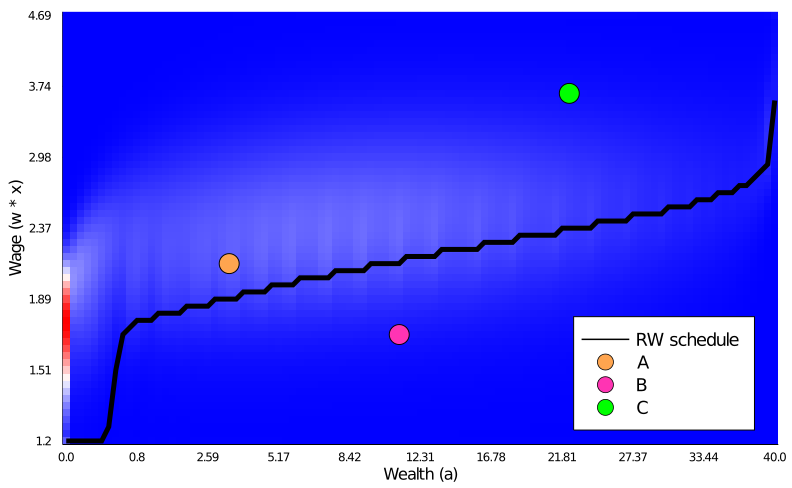

In [352]:
a = load("./figure/mu.png")
b = imresize(a, nz, na);
plot(b, yflip=false, xlim=(0.5,na+0.5), ylim=(0.5,nz+0.5), size=(na*7.85,nz*8), legend=:bottomright, legendfontsize=12,
    yticks=(1:10:nz, round.(w .* ezgrid[1:10:nz],digits=2)), ylabel="Wage (w * x)",
    xticks=(1:10:na, round.(agrid[1:10:na], digits=2)), fmt=:png, xlabel="Wealth (a)")
plot!(1:na, rw, color=:black, lw=5, label="RW schedule")
scatter!([24], [26], label="A", markersize=12, color=:tan1)
scatter!([48], [16], label="B", markersize=12, color=:maroon1)
scatter!([72], [50], label="C", markersize=12, color=:lime)

In [353]:
RR = sort(100 .* [(ezgrid[rw[ia]] - ezgrid[iz]) / ezgrid[iz] for (iz, smp) in enumerate(smps) for ia in smp]);

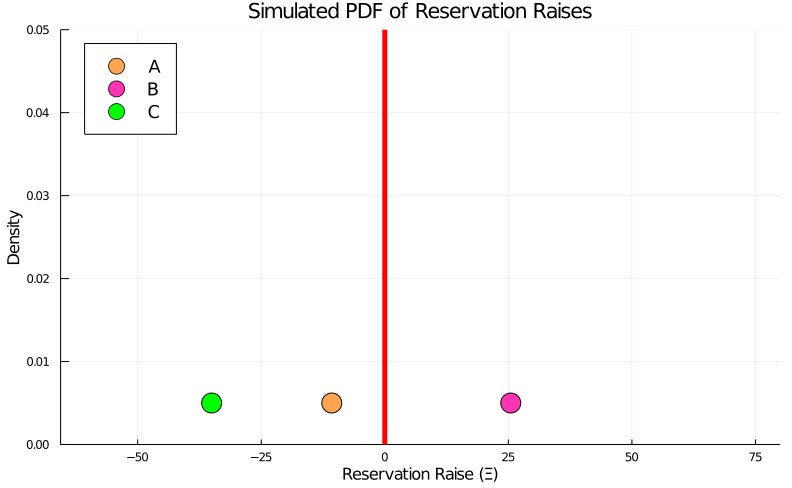

In [354]:
plot(xlabel="Reservation Raise (Ξ)", ylabel="Density", xlim=(RR[1], 80), ylim=(0,0.05),
    size=(na*7.85,nz*8), title="Simulated PDF of Reservation Raises", fmt=:png, legend=:topleft, legendfontsize=12)
scatter!([100*(ezgrid[rw[24]]-ezgrid[26]) / ezgrid[26]], [0.005], label="A", markersize=12, color=:tan1)
scatter!([100*(ezgrid[rw[48]]-ezgrid[16]) / ezgrid[16]], [0.005], label="B", markersize=12, color=:maroon1)
scatter!([100*(ezgrid[rw[72]]-ezgrid[50]) / ezgrid[50]], [0.005], label="C", markersize=12, color=:lime)
plot!([0.0,0.0],[0.0,1.0], label="", color="red", lw=5)

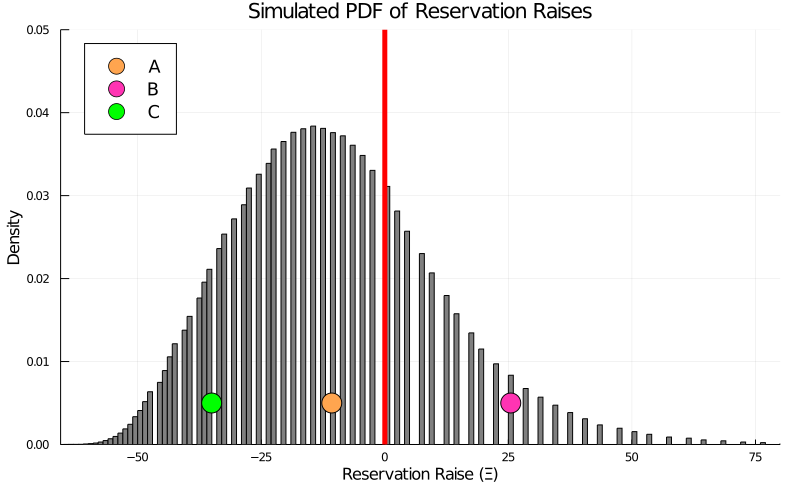

In [355]:
plot(xlabel="Reservation Raise (Ξ)", ylabel="Density", xlim=(RR[1], 80), ylim=(0,0.05),
    size=(na*7.85,nz*8), title="Simulated PDF of Reservation Raises", fmt=:png, legend=:topleft, legendfontsize=12)
histogram!(RR, label="", color="gray", normalize=true, bins=200)
scatter!([100*(ezgrid[rw[24]]-ezgrid[26]) / ezgrid[26]], [0.005], label="A", markersize=12, color=:tan1)
scatter!([100*(ezgrid[rw[48]]-ezgrid[16]) / ezgrid[16]], [0.005], label="B", markersize=12, color=:maroon1)
scatter!([100*(ezgrid[rw[72]]-ezgrid[50]) / ezgrid[50]], [0.005], label="C", markersize=12, color=:lime)
plot!([0.0,0.0],[0.0,1.0], label="", color="red", lw=5)

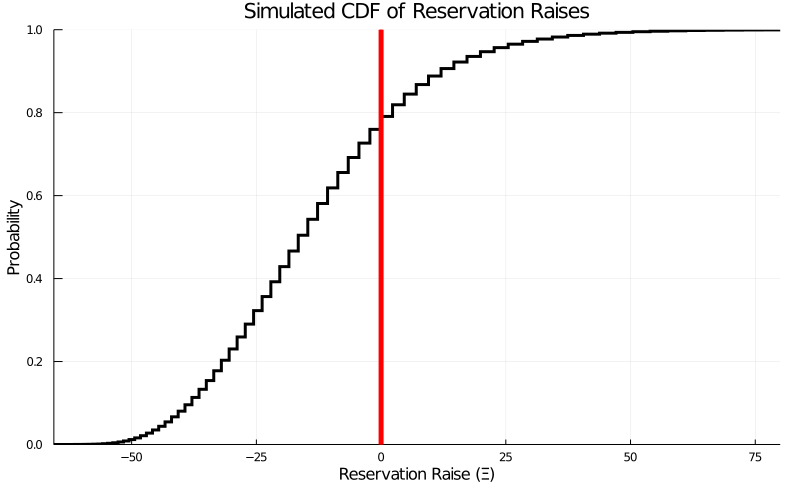

In [356]:
plot(xlabel="Reservation Raise (Ξ)", ylabel="Proportion", title="Simulated CDF of Reservation Raises",
    fmt=:png, xlim=(RR[1], 80), size=(na*7.85,nz*8), ylim=(0,1.0), legend=:bottomright)
plot!(RR, range(0,1,length=length(RR)), label="", color="black", lw=3)
plot!([0.0,0.0],[0.0,1.0], label="", color="red", lw=5)

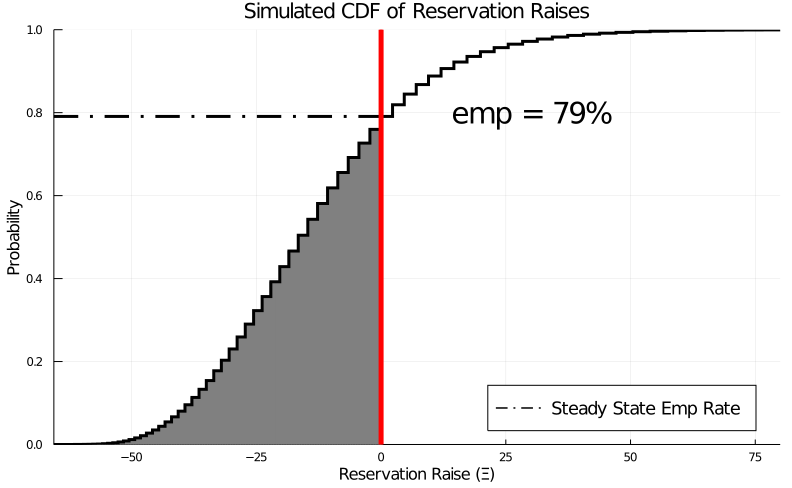

In [358]:
RRcdf = LinearInterpolation(RR, range(0,1, length=length(RR)))

plot(xlabel="Reservation Raise (Ξ)", ylabel="Proportion", title="Simulated CDF of Reservation Raises",
    fmt=:png, xlim=(RR[1], 80), size=(na*7.85,nz*8), ylim=(0,1.0), legend=:bottomright)

plot!([RR[1],0.0],[RRcdf(eps()),RRcdf(eps())], linestyle=:dashdot,
    label="Steady State Emp Rate", legendfontsize=12, color=:black, lw=3)
plot!([0.0,0.0],[0.0,1.0], label="", color="red", lw=3)

for r in range(RR[1], 0.0, length=200)
    plot!([r,r],[0.0,RRcdf(r)], lw=3, color=:gray, label="")
end

plot!(RR, range(0,1,length=length(RR)), label="", color="black", lw=3)

plot!([0.0,0.0],[0.0,1.0], label="", color="red", lw=5)
annotate!(30.3, 0.8, text("emp = 79%",:black, 20)) 

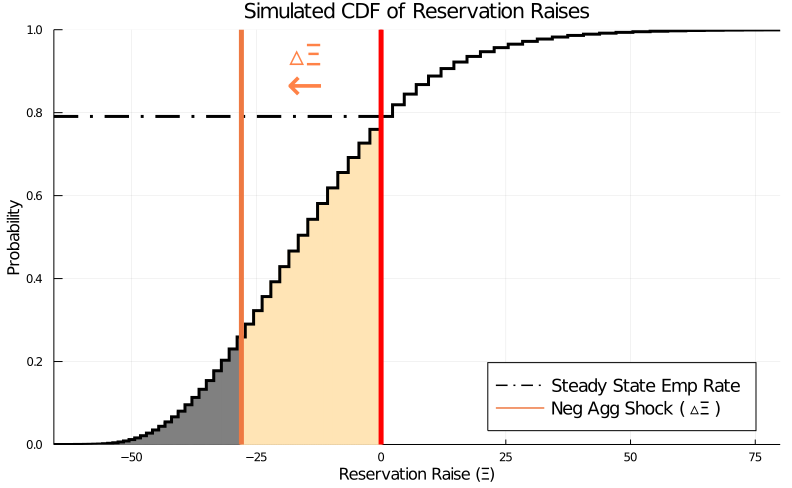

In [359]:
plot(xlabel="Reservation Raise (Ξ)", ylabel="Proportion", title="Simulated CDF of Reservation Raises",
    fmt=:png, xlim=(RR[1], 80), size=(na*7.85,nz*8), ylim=(0,1.0))

plot!([RR[1],0.0],[RRcdf(eps()),RRcdf(eps())], linestyle=:dashdot,
    label="Steady State Emp Rate", legend=:topleft, legendfontsize=12, color=:black, lw=3)
plot!([0.0,0.0],[0.0,1.0], label="", color="red", lw=3)

for r in range(RR[1], -28.0, length=200)
    plot!([r,r],[0.0,RRcdf(r)], lw=3, color=:gray, label="")
end

for r in range(-28.0, 0.0, length=200)
    plot!([r,r],[0.0,RRcdf(r)], lw=3, color=:moccasin, label="")
end

plot!(RR, range(0,1,length=length(RR)), label="", color="black", lw=3)

plot!([-28.0,-28.0],[0.0,1.0], label="Neg Agg Shock ( ▵Ξ )", color="sienna2", lw=5, legend=:bottomright, legendfontsize=12)
plot!([0.0,0.0],[0.0,1.0], label="", color="red", lw=5)
annotate!(-15.3, 0.94, text("▵Ξ",:sienna1, 20))
annotate!(-15.3, 0.87, text("←",:sienna1, 30))

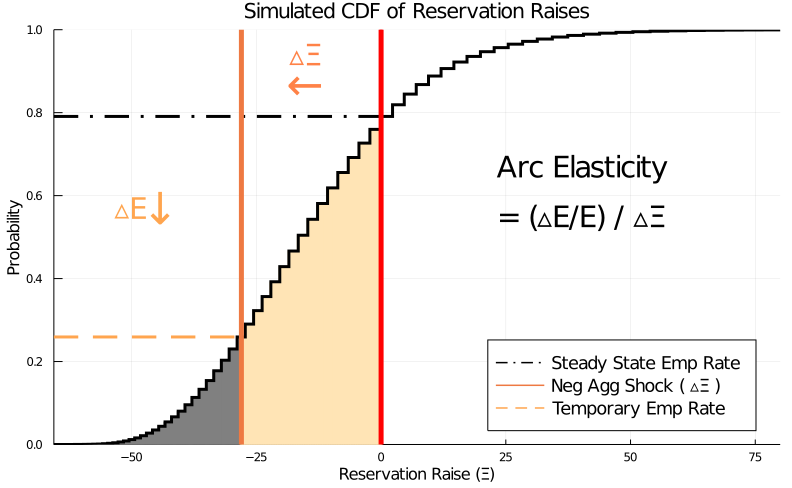

In [360]:
plot(xlabel="Reservation Raise (Ξ)", ylabel="Proportion", title="Simulated CDF of Reservation Raises",
    fmt=:png, xlim=(RR[1], 80), size=(na*7.85,nz*8), ylim=(0,1.0))

plot!([RR[1],0.0],[RRcdf(eps()),RRcdf(eps())], linestyle=:dashdot,
    label="Steady State Emp Rate", legend=:topleft, legendfontsize=12, color=:black, lw=3)
plot!([0.0,0.0],[0.0,1.0], label="", color="red", lw=3)

for r in range(RR[1], -28.0, length=200)
    plot!([r,r],[0.0,RRcdf(r)], lw=3, color=:gray, label="")
end

for r in range(-28.0, 0.0, length=200)
    plot!([r,r],[0.0,RRcdf(r)], lw=3, color=:moccasin, label="")
end

plot!(RR, range(0,1,length=length(RR)), label="", color="black", lw=3)

plot!([-28.0,-28.0],[0.0,1.0], label="Neg Agg Shock ( ▵Ξ )", color="sienna2", lw=5, legend=:bottomright, legendfontsize=12)
plot!([RR[1],-28],[RRcdf(-28.0),RRcdf(-28.0)],
    linestyle=:dash, lw=3, color=:tan1, label="Temporary Emp Rate")
plot!([0.0,0.0],[0.0,1.0], label="", color="red", lw=5)
annotate!(-15.3, 0.94, text("▵Ξ",:sienna1, 20))
annotate!(-15.3, 0.87, text("←",:sienna1, 30))
annotate!(-50.3, 0.57, text("▵E",:tan1, 20))
annotate!(-44.3, 0.57, text("↓",:tan1, 30))
annotate!(40.3, 0.67, text("Arc Elasticity",:black, 20))
annotate!(40.3, 0.55, text("= (▵E/E) / ▵Ξ",:black, 20))

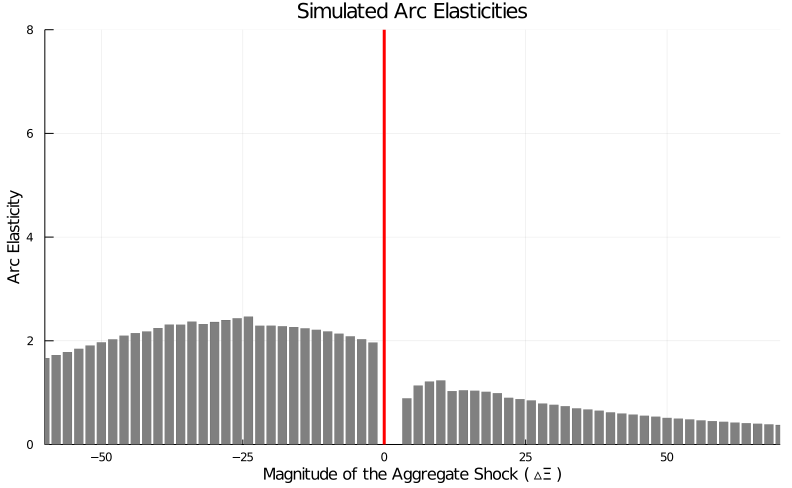

In [364]:
arc = [100 * (RRcdf(r)-RRcdf(eps())) / RRcdf(eps()) / r for r in -60:2:70]
bar(-60:2:70, arc, color=:gray, lw=0.1, title = "Simulated Arc Elasticities", ylabel="Arc Elasticity",
    label="", ylim=(0,8), xlim=(-60, 70), xlabel="Magnitude of the Aggregate Shock ( ▵Ξ )", fmt=:png,
    size=(na*7.85,nz*8))
plot!([0.0,0.0],[0.0,8.0], label="", color="red", lw=3)